# Evaluation terminale : Machine learning & python -- BENLAHCEN Chahine

Cet examen se compose de 3 parties : 
<ol>
  <li>Restitution théorique</li>
  <li>Restitution pratique</li>
  <li>Cas pratique</li>
</ol>

## Partie 1 : Restitution théorique

Pour cette partie, l'objectif est de décrire des notions théoriques. Essayez de rédiger des réponses claires en utilisant vos mots.

#### Question 1.1: Donner une définition du machine learning. Eviter de recopier de wikipédia, essayer d'en donner une description en quelques mots.

Réponse : Le machine learning est une intelligence artificielle qui apprend d'elle même via des données ou des algorithmes qu'on lui transmet 

#### Question 1.2: Donner quelques applications concrètes d'utilisation du machine learning.

Réponse : Le machine learning peut être utilisés pour découvrir des maladies, rechercher un objet via une photo ou autres... Par exemple IBM qui permet d'extraire à partir des notes prises par des médecins pendant les consultations (notes électroniques), des critères pour diagnostiquer l’insuffisance cardiaque. 

#### Question 1.3: Quelles sont les 2 principales familles "d'apprentissage"? Donner une rapide définition de chacune

Réponse : 
- Supervisé : On définit les entrées et sorties souhaités
- Non supervisé : L'algo créer lui-même la façon dont l'entrée de la structure doit être

#### Question 1.4: Dans laquelle de ces familles appartient la "classification"? Le "clustering"?

Réponse : 
- Classification --> supervisé
- Clustering --> non supervisé

#### Question 1.5: Définissez ce qu'est un arbre de décision et décrivez  de manière simple sa construction.

Réponse : Un arbre de décision est une methode pour dire si oui ou non par rapport à la question : (ex: 0 < 1 ? === oui) un si de suite. Cela ressemble à un arbre généalogique 

#### Question 1.6: Dans quelle situation parle-t-on "d'overfitting"?

Réponse : C'est lorsque que le résultat correspondant, correspond trop à une partie d'un ensemble de données particulier.

## Partie 2 : Etude d'un cas pratique

Pour cette partie, vous devrez vous inspirer des TP réalisés en cours. 

Il vous faut importer les librairies qui vous seront nécessaires répondre à la problèmatique dans la cellule suivante :

In [1]:
# packages
import pandas as pd
#...
from pandas_profiling import ProfileReport



Importez les données comme suit :

In [58]:
data = pd.read_csv('nba_logreg.csv')

Ce jeu de données décrit les caracteristiques de jeu de joueurs de Basketball au sein de la NBA. La variable d'intérêt Y est "TARGET_5yrs". La description de ce dataset se trouve dans le fichier "NBA_variables_doc.png"

__L'objectif du problème est de réussir à prédire si un jeune joueur durera plus ou moins que 5ans au sein de la ligue.__

In [30]:
data

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.1: Donnez au moins une colonne qui doit être enlevé du jeu de données. Pourquoi? 

Réponse : Nous pouvons supprimé les colonnes par exemple : OREB et DREB car nous avons déjà les valeurs réunis dans REB

#### Exercice 2.1: Enlevez les variables du dataset qui vous semble inutile au problème.

In [59]:
# code..
data = data.drop(columns=["Name", "FGM", "FGA", "3P Made", "3PA", "FTM", "FTA", "OREB", "DREB"])
    
data

,GP,MIN,PTS,FG%,3P%,FT%,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,80,15.8,4.3,43.3,14.3,79.2,1.2,2.5,0.6,0.2,0.8,0.0
1336,68,12.6,3.9,35.8,16.7,79.4,1.5,2.3,0.8,0.0,1.3,1.0
1337,43,12.1,5.4,55.0,0.0,64.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,52,12.0,4.5,43.9,10.0,62.5,0.7,2.2,0.4,0.1,0.8,1.0


#### Question 2.2: Ce dataset contient - il des données manquantes ou non exploitable?

Réponse : Oui certaines données sont manquantes 

#### Exercice 2.2: Si oui, donnez en la proportion par colonne.

In [40]:
# code..
data.isnull().sum()

Name            0
GP              0
MIN             0
PTS             0
FG%             0
3P%            11
FT%             0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [60]:
data.dropna(inplace=True)

#### Exercice 2.3: Séparez les données en 2 échantillons train-test

In [61]:
# code..
# importing packages
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# model variables definitions
y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) 

#### Question 2.3: Pourquoi cette étape est-elle indispensable?

Réponse : Oui c'est très important ! Cela permet de mesurer la précision de notre model

#### Exercice 2.4: Entrainez sur ces données un arbre de décision. Calculer une prédiction.

In [67]:
# code..
# calling decisiontree classifier
clf = DecisionTreeClassifier()
# fitting on data
clf = clf.fit(X_train, y_train)

estimate = clf.predict(X_test)

# average diffence estimation true values
print(abs(y_test - estimate).mean())
print((y_test - estimate).std())

0.33933933933933935
0.5833352715850629


#### Exercice 2.5: Evaluez la qualité du modèle. 

In [68]:
# accuracy
accuracy_score(y_test, estimate, normalize=True, sample_weight=None)

0.6606606606606606

#### Question 2.4: Quelle métrique utilisez vous? Pourquoi? 

Réponse : J'utilise la metrique accuracy_score car je trouve que c'est la simple à utiliser pour ce model

#### Question 2.5: Le modèle construit est-il de qualité satisfaisante? Expliquez.

Réponse : Non la qualité n'est pas vraiment satisfaisante 

#### Exercice 2.6: Produisez une visualisation graphique de l'arbre construit

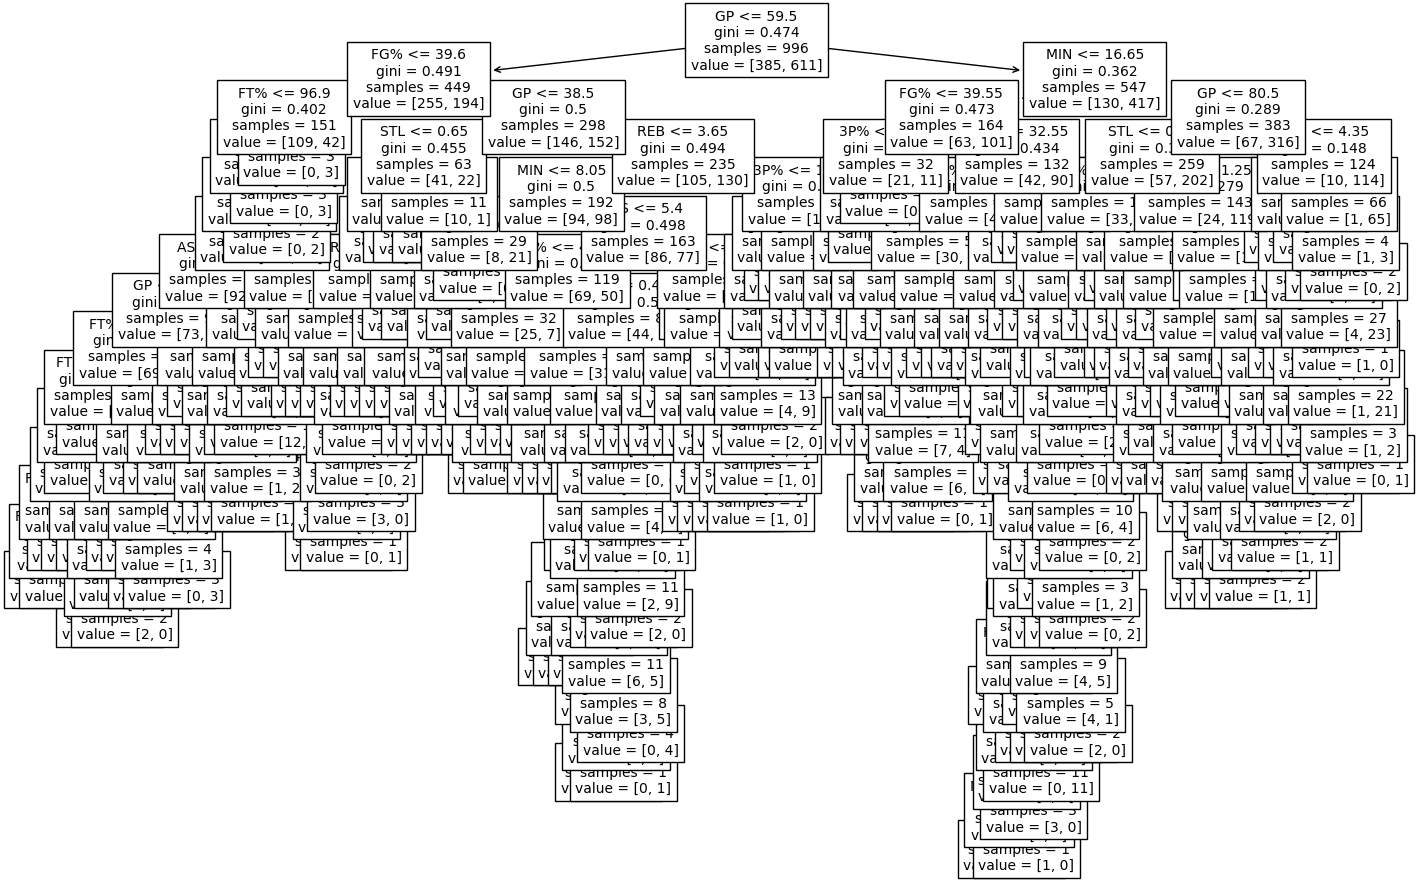

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.6: Donnez un exemple de lecture d'un tel arbre.

Réponse : Si GP <= 59.5 alors si FG% <= 39.6 ...

#### Question 2.7: Comment peut - on améliorer la qualité du modèle? Donnez au moins 3 méthodes:

Réponse : 
- Nous pouvons optimiser les hyperparamètres
- Faire une validation croisée
- Utiliser des données et des caractéristiques significatives

#### Exercice 2.7: Essayer d'appliquer une de ces méthodes

0.3183183183183183
0.5557165366100187


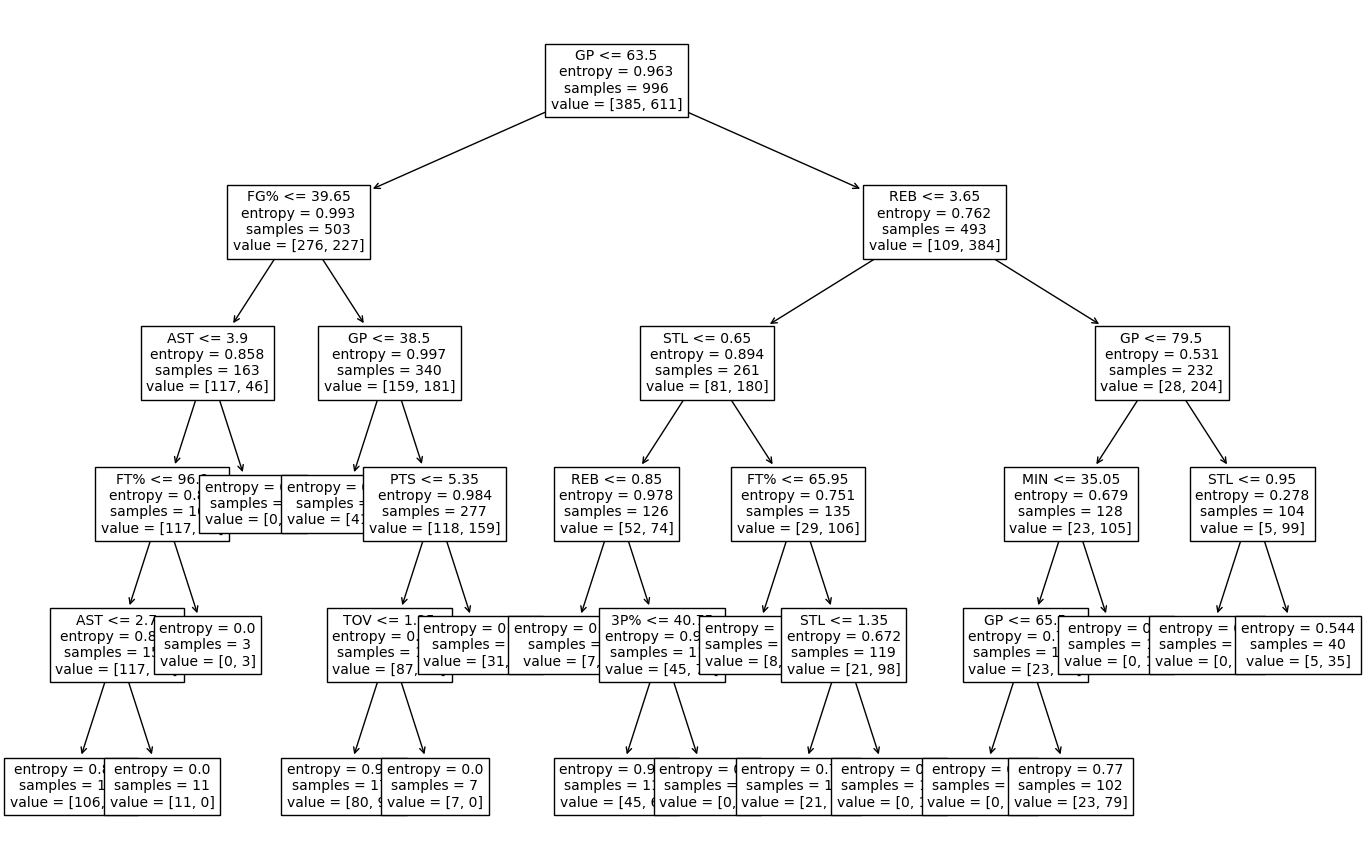

In [66]:
# calling decisiontree classifier
clf_b = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_split=0.1)
# fitting on data
clf_b = clf_b.fit(X_train, y_train)
# estimating on test
estimate_b = clf_b.predict(X_test)
true = y_test
# average diffence estimation true values
print(abs(estimate_b - true).mean())
print((estimate_b - true).std())

plt.figure(figsize=(17,11))
plot_tree(clf_b, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Question 2.8: Concluez

Réponse : Je conclus qu'une personne sur 2 fera plus de 5 ans au sein de la ligue